In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('ODI.csv', low_memory = False)
df

,Unnamed: 0,Unnamed: 0.1,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,HostCountry
0,0,0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",Australia
1,1,1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",United Kingdom
2,2,2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",India
3,3,3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",United Kingdom
4,4,4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",New Zealand
...,...,...,...,...,...,...,...,...,...,...
4119,4119,4119,ODI # 4120,Australia,Pakistan,Australia,20 runs,Dubai (DSC),"Mar 31, 2019",United Arab Emirates
4120,4120,4120,ODI # 4121,Zimbabwe,U.A.E.,Zimbabwe,7 wickets,Harare,"Apr 10, 2019",Zimbabwe
4121,4121,4121,ODI # 4122,Zimbabwe,U.A.E.,Zimbabwe,4 runs,Harare,"Apr 12, 2019",Zimbabwe
4122,4122,4122,ODI # 4123,Zimbabwe,U.A.E.,Zimbabwe,131 runs,Harare,"Apr 14, 2019",Zimbabwe


In [2]:
df[['Day','year']] = df['Match Date'].str.split(',', expand=True)

<AxesSubplot:xlabel='year', ylabel='Count'>

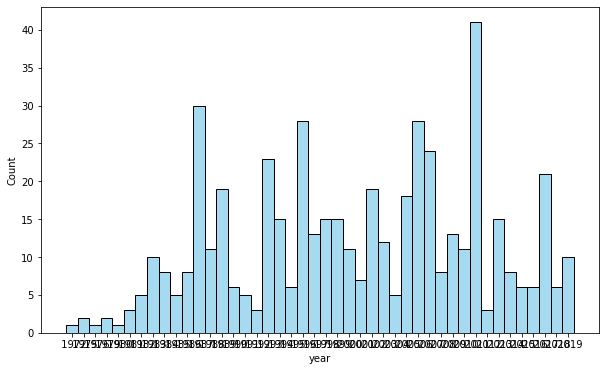

In [3]:
#Q1] Display the histogram that represents year-wise number of matches played by an input country given.
x=df.loc[df["HostCountry"]=="India"]
plt.figure(figsize=(10,6))
sns.histplot(x["year"],color='skyblue')

In [4]:
df["Date"]=df["Match Date"].apply(lambda x:x.split(",")[0])
df["year"]=df["Match Date"].apply(lambda x:x.split(",")[1])

In [5]:
import datetime as dt
df['year'] = pd.to_datetime(df['year'])
TD = df[df['year'].dt.year == 2018]
#or exclude = df[df['year'].dt.year != 2018]

In [6]:
TD['date1'] = pd.to_datetime(TD['year'],format='%Y%m%d')
TD['year1'] = pd.DatetimeIndex(TD['year']).year

C:\Users\Nikita\AppData\Local\Temp/ipykernel_44212/3309425326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TD['date1'] = pd.to_datetime(TD['year'],format='%Y%m%d')
C:\Users\Nikita\AppData\Local\Temp/ipykernel_44212/3309425326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TD['year1'] = pd.DatetimeIndex(TD['year']).year


In [7]:
# Q2] Filter out the dataset based on the year given. (Ex: 2018)
TD = TD.drop(columns=['Match Date', 'year', 'date1', 'Unnamed: 0', 'Unnamed: 0.1', 'Scorecard'])
TD.reset_index(inplace = True, drop = True)
TD

,Team 1,Team 2,Winner,Margin,Ground,HostCountry,Day,Date,year1
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,New Zealand,Jan 6,Jan 6,2018
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,New Zealand,Jan 9,Jan 9,2018
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,United Arab Emirates,Jan 11,Jan 11,2018
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,New Zealand,Jan 13,Jan 13,2018
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,United Arab Emirates,Jan 13,Jan 13,2018
...,...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,Australia,Nov 11,Nov 11,2018
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),United Arab Emirates,Nov 11,Nov 11,2018
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,Bangladesh,Dec 9,Dec 9,2018
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,Bangladesh,Dec 11,Dec 11,2018


In [8]:
# Q3] Which country played most ODIs in 2018.
# sort in descending order??
T1 = TD["Team 1"].value_counts()
T2 = TD["Team 2"].value_counts()
TT = T1 + T2
TT
# Answer : Zimbabwe

Afghanistan     20.0
Australia       13.0
Bangladesh      20.0
England         24.0
Hong Kong        6.0
India           20.0
Ireland         13.0
Nepal            3.0
Netherlands      NaN
New Zealand      NaN
P.N.G.           4.0
Pakistan         NaN
Scotland        11.0
South Africa    17.0
Sri Lanka       17.0
U.A.E.          11.0
West Indies     18.0
Zimbabwe        26.0
dtype: float64

In [9]:
# Q4] Top three countries who won the most ODIs.
# Answer] England, India, Bangladesh
TD["Winner"].value_counts()

England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
Pakistan         8
West Indies      8
Ireland          8
New Zealand      8
Sri Lanka        6
Scotland         5
Zimbabwe         5
U.A.E.           4
tied             3
Australia        2
no result        2
Hong Kong        1
P.N.G.           1
Netherlands      1
Nepal            1
Name: Winner, dtype: int64

<AxesSubplot:>

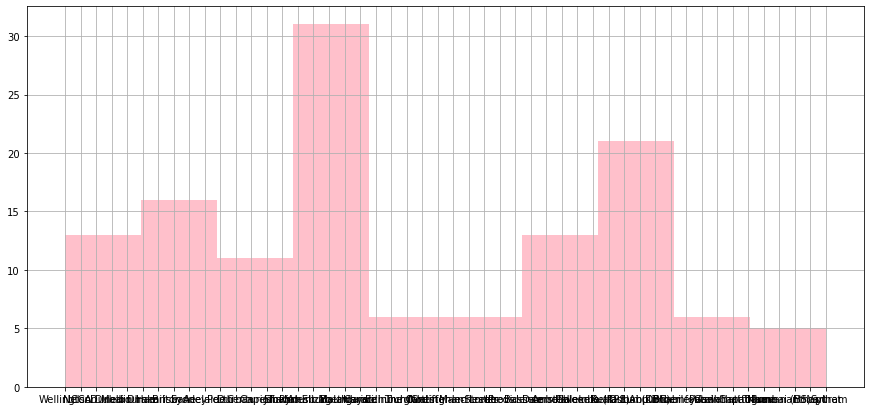

In [10]:
# Q5] Based on the ground, map the ODIs.
grounds = TD['Ground']
grounds
a_grounds = grounds.value_counts() #matches per ground
a_grounds
plt.figure(figsize = (15,7))
grounds.hist(color="pink")

In [11]:
TD["month"] = TD["Date"].apply(lambda x:x.split(" ")[0])
TD["date"] = TD["Date"].apply(lambda x:x.split(" ")[1])
TD=TD.drop(['Date'], axis=1)
TD

,Team 1,Team 2,Winner,Margin,Ground,HostCountry,Day,year1,month,date
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,New Zealand,Jan 6,2018,Jan,6
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,New Zealand,Jan 9,2018,Jan,9
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,United Arab Emirates,Jan 11,2018,Jan,11
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,New Zealand,Jan 13,2018,Jan,13
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,United Arab Emirates,Jan 13,2018,Jan,13
...,...,...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,Australia,Nov 11,2018,Nov,11
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),United Arab Emirates,Nov 11,2018,Nov,11
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,Bangladesh,Dec 9,2018,Dec,9
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,Bangladesh,Dec 11,2018,Dec,11


In [12]:
# Q9] Month in which most ODIs were played
Tmonth = TD["month"].value_counts()
Tmonth
#Answer] March

Mar    26
Jan    23
Sep    14
Oct    14
Feb    13
Jul    12
Aug    10
Nov     7
Jun     6
Dec     3
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='Count'>

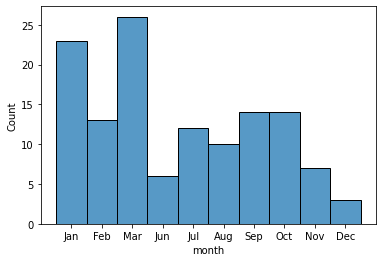

In [13]:
# Q10] Draw histogram that represents the number of matches played in each month of 2018.
sns.histplot(TD.month)

In [14]:
# Q12] Team which had lost most of the matches.
T4 = TD["Winner"].value_counts()
T5 = TT - T4
T5
#Answer] Zimbabwe

Afghanistan      8.0
Australia       11.0
Bangladesh       7.0
England          7.0
Hong Kong        5.0
India            6.0
Ireland          5.0
Nepal            2.0
Netherlands      NaN
New Zealand      NaN
P.N.G.           3.0
Pakistan         NaN
Scotland         6.0
South Africa     8.0
Sri Lanka       11.0
U.A.E.           7.0
West Indies     10.0
Zimbabwe        21.0
no result        NaN
tied             NaN
dtype: float64

In [16]:
TD[TD["Winner"].str.contains("no result")]

,Team 1,Team 2,Winner,Margin,Ground,HostCountry,Day,year1,month,date
106,Sri Lanka,England,no result,NaN,Dambulla,Sri Lanka,Oct 10,2018,Oct,10
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),United Arab Emirates,Nov 11,2018,Nov,11


In [17]:
#identify partial string to look for
keep= ["runs"]

#filter for rows that contain the partial string "Wes" in the conference column
TD[TD.Margin.str.contains('runs'.join(keep))]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [18]:
TD.loc[mask, ['Winner', 'month']]

NameError: name 'mask' is not defined

In [31]:
#TD['newG'] = np.where((TD['HostCountry'] = TD['Team 1']) & (TD['HostCountry'] = TD['Team 2']), TD['HostCountry'], np.nan)
comparison_column = np.where(TD["HostCountry"] == TD["Team 1"])

In [32]:
TD

,Team 1,Team 2,Winner,Margin,Ground,HostCountry,Day,year1,month,date,newG
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,New Zealand,Jan 6,2018,Jan,6,NaN
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,New Zealand,Jan 9,2018,Jan,9,NaN
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,United Arab Emirates,Jan 11,2018,Jan,11,NaN
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,New Zealand,Jan 13,2018,Jan,13,NaN
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,United Arab Emirates,Jan 13,2018,Jan,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,Australia,Nov 11,2018,Nov,11,NaN
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),United Arab Emirates,Nov 11,2018,Nov,11,NaN
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,Bangladesh,Dec 9,2018,Dec,9,NaN
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,Bangladesh,Dec 11,2018,Dec,11,NaN
